<a href="https://colab.research.google.com/github/wizard339/education/blob/main/amortized_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Амортизационный анализ (amortyzed analysis)



В ходе ***амортизационного анализа*** время, необходимое для выполнения последовательности операций, усредняется по всем выполняемым операциям.

Данный вид анализа можно использовать, например, чтобы показать, что если одна из операций последовательности является дорогостоящей,то при усреднении по всей последовательности средняя стоимость операции будет небольшой.

Амортизационный анализ ***не учитывает вероятность***.

При нем гарантируется ***средняя производительность операций в худшем случае***.

## Груповой анализ (aggregate analysis)

В ходе ***группового анализа*** показывается, что в наихудшем случае суммарное время выполнения последовательности всех n операций равно $T(n)$. Поэтому в наихудшем случае средняя, или ***амортизированная, стоимость*** на одну операцию определяется соотношением $T(n)/n$.

Такая амортизированная стоимость применима ко всем операция, даже если в последовательности имеется несколько разных их типов.

### Пример: стековые операции

В качестве примера группового анализа можно рассмотреть стеки, в которых реализована дополнительная операция

$Multipop(S, k)$ - снимает $k$ объектов (или все оставшиеся) с вершины стека $S$

помимо двух основных 

$Push(S, x)$ - добавляет объект $x$ в стек $S$

$Pop(S)$ - снимает объект с вершины стека $S$ и возвращает его.

In [ ]:
class Stack:

    def __init__(self):
        self.stack = []
        self.top = len(self.stack)

    def stack_empty(self):
        if self.top == 0: return True
        else: return False

    def push(self, x):
        self.top += 1
        self.stack.append(x)

    def pop(self):
        if self.stack_empty():
            raise 'underflow'
        else:
            self.top -= 1
            return self.stack.pop()

    def multipop(self, k):
        while self.stack_empty()==False and k > 0:
            self.pop()
            k -= 1


if __name__=='__main__':
    b = Stack()
    print(b.top)
    print(b.stack_empty())
    b.push(5)
    print(b.top)
    print(b.pop())
    print(b.top)
    b.push(5)
    b.push(5)
    print(b.top)
    b.multipop(3)
    print(b.top)


0
True
1
5
0
2
0


Проанализируем последовательность операций $Push, Pop, Multipop$, действующих на изначально пустой стек. Стоимость операции $Multipop$ в наихудшем случае равна $O(n)$, поскольку в стеке не более $n$ объектов. То есть время любой стековой операции в наихудшем случае равна $O(n)$, а значит для последовательности таких операций $O(n^2)$.

С помощью группового анализа можно получить более точную верхнюю границу при рассмотрении последовательности $n$ операций. Т.к. каждый помещенный в стек объект можно извлечь оттуда не более одного раза, то стоимость произвольной последовательности из $n$ операций над изначально пустым стеком не превышает $O(n)$.

Средняя стоимость выполнения операции равна $O(n)/n = O(1)$.

### Пример: увеличение показаний бинарного счетчика

В качестве другого примера группового анализа можно рассмотреть задачу реализации k-битового бинарного счетчика, который ведет счет от нуля в восходящем направлении. В качестве счетчика используется битовый массив $A[0 ... k-1]$, где $A.length = k$. Младший бит хранящегося в счетчике бинарного числа $x$ находится в элемента $A[0]$, а старший - в элементе $A[k-1]$, так что $x = \sum\limits_{i=0}^{k-1}A[i]⋅2^i$.

Чтобы увеличить показания счетчика на 1 (по модулю $2^k$), используется следующая процедура:

In [ ]:
def increment(A: list) -> None:
  i = 0
  
  while (i < len(A)) and (A[i] == 1):
    A[i] = 0
    i += 1
  
  if i < len(A):
    A[i] = 1

In [ ]:
def aux_print_bin(A: list) -> list:
  # десятичное представление числа
  dec_num = sum([A[i] * 2**i for i in range(0, len(A))])
  print('bin=',*A[::-1], f'\ndec={dec_num}', sep='')

In [ ]:
bin_number = [0, 1, 0, 1, 0, 0]
print('Before increasing:')
aux_print_bin(bin_number)
increment(bin_number)
print('After increasing:')
aux_print_bin(bin_number)

Before increasing:
bin=001010
dec=10
After increasing:
bin=001011
dec=11


На рисунке показано, что происходит в бинарном счтчике при его увеличении 16 раз.

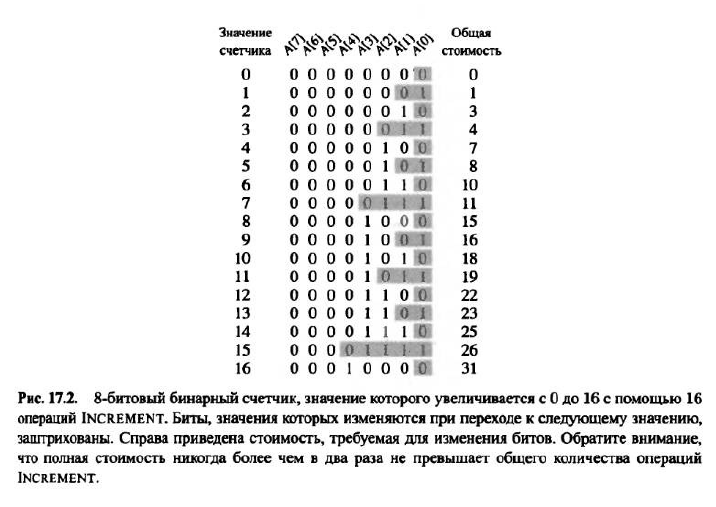

Как и в примере со стеком, поверхностный анализ даст правильную, но неточную оценку. в наихудшем случае, когда массив $A$ состоит только из единиц, для выполнения операции $Increment$ потребуется время $\theta(k)$. Таким образом, выполнение последовательности из $n$ операций $Increment$ для изначально обнуленного счетчика в наихудшем случае займет время $O(nk)$.

На рисунке видно, что далеко не при каждом вызове процедуры $Increment$ изменяются значения всех битов.

Элемент $A[0]$ изменяется при каждом вызове, а элемент $A[1]$ изменяется через раз, т.е. $⌊n/2⌋$ раз. Аналогично бит $A[2]$ изменяется каждый четвертый раз, т.е. $⌊n/4⌋$ раз в последовательности из $n$ операций $Increment$. В общем случае, для $i = 9, 1, ..., k-1$ бит $A[i]$ изменяется $⌊n/2^i⌋$ раз. Биты в позициях $i \geq k$ не изменяются.

Таким образом, общее количество изменений битов при выполнении последовательности операций равно

$\sum\limits_{i=0}^{k-1}\lfloor{\frac{n}{2^i}}\rfloor < n\sum\limits_{i=0}^{∞}\frac{1}{2^i} = 2n$.

Поэтому время выполнения последовательности из $n$ операций $Increment$ над изначально обнуленным счетчиком в наихудшем случае равно $O(n)$. *Амортизированная стоимость* каждой операции равна $O(n) / n = O(1)$.

## Метод бухалтерского учета (accounting method)

В ***методе бухгалтерского учета*** разные операции оцениваются по-разному, в зависимости от их фактической стоимости.

Величина, которая начисляется на операцию, называется ***амортизированной стоимостью***. Если амортизированная стоимость операции превышает ее фактическую стоимость, то соответствующая разность присваивается определенным объектам структуры данных как ***кредит***, который можно впоследствии использовать для компенсирующих выплат на операции, амортизированная стоимость которых меньше их фактической стоимости.

### Пример: стековые операции

Амортизационный анализ методом бухгалтерского учета можно проиллюстрировать с помощью стековых операций.

Фактическая стоимость основных стековых операций следующая:

$Push$ 1

$Pop$ 1

$Multipop$ $min(k, s)$

Присвоим приведенные ниже амортизированные стоимости:

$Push$ 2

$Pop$ 0

$Multipop$ 0

Теперь покажем, что любую последовательность стековых операций можно оплатить путем начисления амортизированных стоимостей.

Если представить аналогию стека в виде стопки тарелок, то при добавлении тарелки в стопку 1 доллар затрачивается на оплату самой операции добавления, а еще 1 доллар остается в запасе, как бы на этой тарелке. Т.е. в любой момент времени каждой тарелке стека соответствует 1 доллар кредита.

Поэтому благодаря переоценке операции $Push$ пропадает необходимость начислять какую-либо сумму на операции $Pop$ и $Multipop$.

### Пример: увеличение показаний бинарного счетчика

В качестве другого примера проанализируем операцию $Increment$, которая выполняется над изначально обнуленным бинарным счетчиком.

Для проведения амортизационного анализа начислим на операцию, при которой биту присваивается значение 1 (бит устанавливается), амортизированную стоимость, равную 2 долларам. Когда бит устанавливается, 1 доллар расходуется на оплату операции по установке, оставшийся 1 доллар вкладывается в этот бит в качестве кредита для последующего использования при его обнулении.

Теперь можно определить амортизированную стоимость операции $Increment$. Стоимость обнуления битов выплачивается за счет тех денег, которые связаны с этими битами. В процедуре устанавливается не более одного бита, поэтому амортизированная стоимость операции $Increment$ не превышает 2 долларов. Количество единиц в бинарном числе, представляющем показания счетчика, не может быть отрицательным, поэтому и сумма кредита всегда неотрицательна.

Таким образом полная амортизированная стоимость $n$ операций $Increment$ равна $O(n)$.


## Метод потенциалов (potential method)